# Import Libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
# Set the default figure size for all countplot figures
matplotlib.rcParams['figure.figsize'] = (5, 3.5)  # Replace width and height with desired values
matplotlib.rcParams['legend.fontsize'] = 'small' 

# 2.1 Data Exploration 
# Load Training and Testing Data (Show Key Statistics of Source Data)
Read titanic_train.csv and test.csv file into pandas dataframe.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# Find missing data

In [8]:
import pandas as pd

# Assuming you have 'train' and 'test' DataFrames with missing values

# Count the missing values in train and test datasets
train_missing = train.isnull().sum().sort_values(ascending=False)[:13].reset_index()
test_missing = test.isnull().sum().sort_values(ascending=False)[:13].reset_index()

# Calculate percentage of missing values
train_missing_percentage = (train_missing[0] / len(train)) * 100
test_missing_percentage = (test_missing[0] / len(test)) * 100

# Add columns for missing values and percentages
train_missing['train_missing_percentage'] = train_missing_percentage
test_missing['test_missing_percentage'] = test_missing_percentage

# Rename columns for clarity
train_missing.columns = ['columns', 'train_missing', 'train_missing_percentage']
test_missing.columns = ['columns', 'test_missing', 'test_missing_percentage']

# Combine train and test missing values and percentages
missing_columns = pd.merge(train_missing, test_missing, on='columns')

missing_columns

,columns,train_missing,train_missing_percentage,test_missing,test_missing_percentage
0,CryoSleep,217,2.496261,93,2.174421
1,ShoppingMall,208,2.392730,98,2.291326
2,VIP,203,2.335212,93,2.174421
3,HomePlanet,201,2.312205,87,2.034136
4,Name,200,2.300702,94,2.197802
5,Cabin,199,2.289198,100,2.338087
6,VRDeck,188,2.162660,80,1.870470
7,FoodCourt,183,2.105142,106,2.478373
8,Spa,183,2.105142,101,2.361468
9,Destination,182,2.093639,92,2.151040


<Axes: >

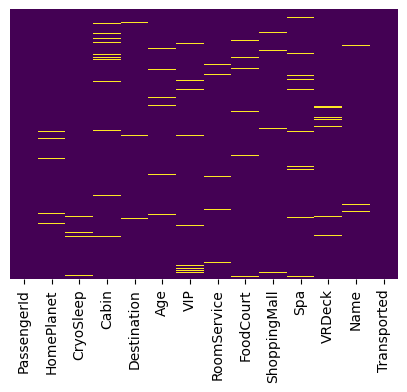

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #created heatmap of boolean values (true/false)

<Axes: >

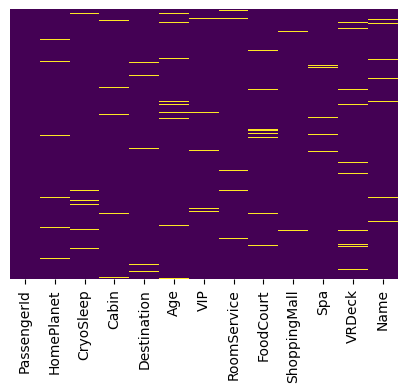

In [10]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #created heatmap of boolean values (true/false)

There seems to be missing data across all attributes (Excluding passengerID and Transported). We will fill in these NaN values in later steps. 

# Find Categorical Variables with high cardinality

In [11]:
print(train.nunique())

# Obtain categorical variables with high cardinality
print([col for col in train.columns if train[col].dtype==object and train[col].nunique()>20 ])

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64
['PassengerId', 'Cabin', 'Name']


In [12]:
print(test.nunique())

# Obtain categorical variables with high cardinality
print([col for col in test.columns if test[col].dtype==object and test[col].nunique()>20 ])

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64
['PassengerId', 'Cabin', 'Name']


PassengerId, Cabin, Name are all categorical variables with high cardinality so we have to create new variables that can act as a lower dimensional representation for this information.

The general goal would be to seperate/generalise high cardinality categories.

# Class Imbalance For Training Data (Transported)


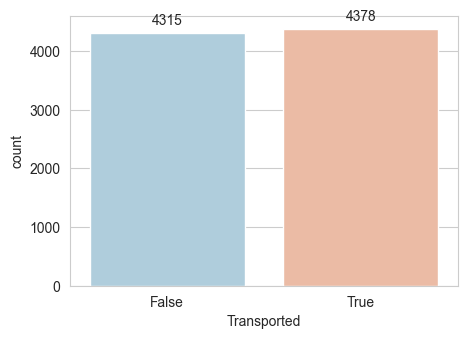

In [13]:
# Set Seaborn Style
sns.set_style('whitegrid') #visualisation

# See ratio of target labels 
ax = sns.countplot(x='Transported',data=train,hue='Transported',palette='RdBu_r', legend = False) #see ratio of target labels

# Annotate the countplot with data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Show the plot
plt.show()

Number of People who were not transported = 49.6%  
Number of People who were transported = 50.4%  
Ratio of target labels are quite evenly spread in training data

## 2.2 Feature Engineering (Refer to Lecture 2 for definition)
Feature Cleaning (Deal with missing / noisy values)
Feature Aggregation (Combine 2 or more features into single feature or values)
Feature Construction (Create new features to capture more important information of data than original features for specific task) 
Feature Transformation (Transform feature of k distinct categorical values to k numerical features of binary values (0/1)

# Feature Construction: Cabin - Cabin Deck | Cabin Number | Cabin Side

In [14]:
def cabin(df):
    # Split 'Cabin' into columns - Deck, Cabin_num, and Side
    split_cabin = df["Cabin"].str.split("/", expand=True)
    df[["CabinDeck", "CabinNum", "CabinSide"]] = split_cabin
    
    # Fill missing values in 'CabinDeck' and 'CabinSide' with mode
    df['CabinDeck'] = df['CabinDeck'].fillna(df['CabinDeck'].mode()[0])
    df['CabinSide'] = df['CabinSide'].fillna(df['CabinSide'].mode()[0])
    
    # Drop 'Cabin' column 
    df.drop('Cabin', axis=1, inplace=True, errors='ignore')
    
    return df

In [15]:
cabin(train)
cabin(test)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,F,NaN,S
4274,9271_01,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


## Feature Cleaning & Aggregation: Age Group 
# Fill Missing Age with Mean Then Conduct Even Binning: Equal Distance


In [16]:
print(min(train['Age']),max(train['Age']),min(test['Age']),max(test['Age']))

0.0 79.0 0.0 79.0


In [17]:
def age_group(df):
    df['Age'] = df['Age'].fillna(df['Age'].mean()) # fill missing Age with mean
    
    conditions = [
        (df['Age'] < 10),
        ((df['Age'] >= 10) & (df['Age'] < 20)),
        ((df['Age'] >= 20) & (df['Age'] < 30)),
        ((df['Age'] >= 30) & (df['Age'] < 40)),
        ((df['Age'] >= 40) & (df['Age'] < 50)),
        ((df['Age'] >= 50) & (df['Age'] < 60)),
        ((df['Age'] >= 60) & (df['Age'] < 70)),
        (df['Age'] >= 70)
    ]

    values = [0, 1, 2, 3, 4, 5, 6, 7]

    df['AgeGroup'] = np.select(conditions, values, default=0)
    return df

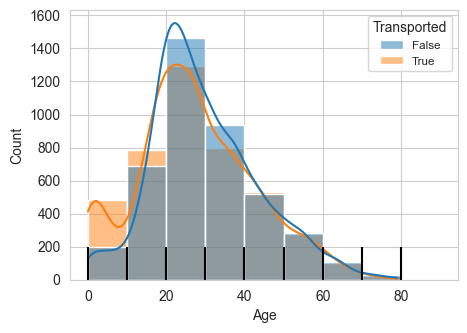

In [18]:
binwidth = 10
sns.histplot(x=train['Age'], bins=range(0, 100, binwidth), hue=train['Transported'], kde=True)

# Add vertical lines
plt.vlines([0,10, 20, 30, 40, 50, 60, 70, 80], ymin=0, ymax=200, color='black')

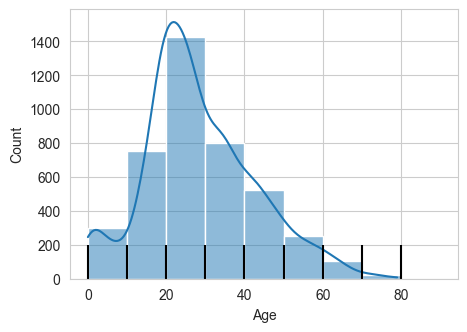

In [19]:
binwidth = 10
sns.histplot(x=test['Age'], bins=range(0, 100, binwidth), kde=True)

# Add vertical lines
plt.vlines([0,10, 20, 30, 40, 50, 60, 70, 80], ymin=0, ymax=200, color='black')

In [20]:
age_group(train)
age_group(test)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide,AgeGroup
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,2
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,3
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,3
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,3
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,F,NaN,S,4
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,2
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,2


# Feature Construction: Is Alone
We create a new column IsAlone with reference to PassengerID Column.

In [21]:
def IsAlone(df):
    df[['GroupNo','PassengerNo']] = df['PassengerId'].str.split("_", expand=True)
    
    df['IsAlone'] = df.groupby('GroupNo')['PassengerNo'].transform('max').astype(int) < 2
    
    df['IsAlone'] = df['IsAlone'].astype(int) #convert boolean values to int
    
    # Drop 'GroupNo' and 'PassengerNo' columns
    df.drop(columns=['GroupNo', 'PassengerNo'], inplace=True)
    
    return df

In [22]:
IsAlone(train)
IsAlone(test)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide,AgeGroup,IsAlone
0,0013_01,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,2,1
1,0018_01,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,1,1
2,0019_01,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,3,1
3,0021_01,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,3,1
4,0023_01,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,3,0
4273,9269_01,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,F,NaN,S,4,1
4274,9271_01,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,2,1
4275,9273_01,Europa,False,NaN,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,2,1


## Feature Cleaning: Fill Remaining Missing Values with 0 or mode 
## & Convert Remaining Boolean Columns to Integer

In [23]:
def convert_bool_to_int(df, columns):
    """
    Convert boolean columns to integers (0 or 1) in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing boolean columns.
        columns (list): List of column names to be converted.

    Returns:
        pd.DataFrame: DataFrame with specified boolean columns converted to integers.
    """
    for col in columns:
        if col in df.columns:
            df[col] = df[col].astype(int)
    return df

def fillna(df):
    num_feats = ['VIP', 'CryoSleep', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    cat_feats = ['HomePlanet', 'Destination']

    # fillna
    df[num_feats] = df[num_feats].fillna(value=0)  # with 0
    df[cat_feats] = df[cat_feats].fillna(df.mode().iloc[0])  # with mode

    # convert boolean columns to int
    col_lst = ["Transported", "VIP", "CryoSleep"]
    df = convert_bool_to_int(df, col_lst)
    return df

In [24]:
fillna(train)
fillna(test)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide,AgeGroup,IsAlone
0,0013_01,Earth,1,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,2,1
1,0018_01,Earth,0,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,1,1
2,0019_01,Europa,1,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,3,1
3,0021_01,Europa,0,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,3,1
4,0023_01,Earth,0,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,3,0
4273,9269_01,Earth,0,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,Matty Scheron,F,NaN,S,4,1
4274,9271_01,Mars,1,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,2,1
4275,9273_01,Europa,0,TRAPPIST-1e,28.658146,0,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,2,1


## Feature Selection: Drop Unused Columns
High cardinality columns are dropped as that make it difficult for modelling and data are too scattered to obtain any meaningful observations.


In [25]:
print(train.nunique())

# Obtain categorical variables with high cardinality
print([col for col in train.columns if train[col].dtype==object and train[col].nunique()>20 ])

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               81
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
CabinDeck          8
CabinNum        1817
CabinSide          2
AgeGroup           8
IsAlone            2
dtype: int64
['PassengerId', 'Name', 'CabinNum']


In [26]:
def drop_cols_safely(df, cols_to_drop):
    columns_exist = [col for col in cols_to_drop if col in df.columns]
    columns_not_exist = list(set(cols_to_drop) - set(columns_exist))
    
    if columns_not_exist:
        print(f"Columns not found in the DataFrame: {columns_not_exist}")
    else:
        df.drop(columns=cols_to_drop, inplace=True)
    
    return df

# Usage:
def dropcols(df):
    cols_to_drop = ['PassengerId', 'Name', 'CabinNum']
    df = drop_cols_safely(df, cols_to_drop)
    return df

In [27]:
dropcols(train)
dropcols(test)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,AgeGroup,IsAlone
0,Earth,1,TRAPPIST-1e,27.000000,0,0.0,0.0,0.0,0.0,0.0,G,S,2,1
1,Earth,0,TRAPPIST-1e,19.000000,0,0.0,9.0,0.0,2823.0,0.0,F,S,1,1
2,Europa,1,55 Cancri e,31.000000,0,0.0,0.0,0.0,0.0,0.0,C,S,3,1
3,Europa,0,TRAPPIST-1e,38.000000,0,0.0,6652.0,0.0,181.0,585.0,C,S,3,1
4,Earth,0,TRAPPIST-1e,20.000000,0,10.0,0.0,635.0,0.0,0.0,F,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,TRAPPIST-1e,34.000000,0,0.0,0.0,0.0,0.0,0.0,G,S,3,0
4273,Earth,0,TRAPPIST-1e,42.000000,0,0.0,847.0,17.0,10.0,144.0,F,S,4,1
4274,Mars,1,55 Cancri e,28.658146,0,0.0,0.0,0.0,0.0,0.0,D,P,2,1
4275,Europa,0,TRAPPIST-1e,28.658146,0,0.0,2680.0,0.0,0.0,523.0,D,P,2,1


## Feature Transformation: One hot Encoding 

In [28]:
train_encoded = pd.get_dummies(train, dtype=np.int32)
test_encoded = pd.get_dummies(test, dtype=np.int32)

## Final Features Statistics For Modelling

In [29]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int32  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int32  
 9   AgeGroup                   8693 non-null   int32  
 10  IsAlone                    8693 non-null   int32  
 11  HomePlanet_Earth           8693 non-null   int32  
 12  HomePlanet_Europa          8693 non-null   int32  
 13  HomePlanet_Mars            8693 non-null   int32

In [30]:
train_encoded.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,3,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,5,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,0,0,0,0,1,0,0,0,1


In [31]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int32  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int32  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   AgeGroup                   4277 non-null   int32  
 9   IsAlone                    4277 non-null   int32  
 10  HomePlanet_Earth           4277 non-null   int32  
 11  HomePlanet_Europa          4277 non-null   int32  
 12  HomePlanet_Mars            4277 non-null   int32  
 13  Destination_55 Cancri e    4277 non-null   int32

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   int32  
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int32  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  CabinDeck     4277 non-null   object 
 11  CabinSide     4277 non-null   object 
 12  AgeGroup      4277 non-null   int32  
 13  IsAlone       4277 non-null   int32  
dtypes: float64(6), int32(4), object(4)
memory usage: 401.1+ KB


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int32  
 11  CabinDeck     8693 non-null   object 
 12  CabinSide     8693 non-null   object 
 13  AgeGroup      8693 non-null   int32  
 14  IsAlone       8693 non-null   int32  
dtypes: float64(6), int32(5), object(4)
memory usage: 849.1+ KB


In [34]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinSide,AgeGroup,IsAlone
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,P,3,1
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,S,2,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,S,5,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,S,3,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,S,1,1


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   int32  
 2   Destination   4277 non-null   object 
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   int32  
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
 10  CabinDeck     4277 non-null   object 
 11  CabinSide     4277 non-null   object 
 12  AgeGroup      4277 non-null   int32  
 13  IsAlone       4277 non-null   int32  
dtypes: float64(6), int32(4), object(4)
memory usage: 401.1+ KB


In [36]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinSide,AgeGroup,IsAlone
0,Earth,1,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,G,S,2,1
1,Earth,0,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,F,S,1,1
2,Europa,1,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,C,S,3,1
3,Europa,0,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,C,S,3,1
4,Earth,0,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,F,S,2,1


######### Below are drafts ########## (to be continued)

# Experiment with Different Models (Before HyperParameter Tuning)
XGBoost, GBT, HisGBT have the highest cross-validation scores. To focus on conducting hyperparameter tuning for these 3.

In [37]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier


# Load your encoded dataset
# Assuming your data is stored in a variable named 'train_encoded'
# Extract features and target variable
X = train_encoded.drop(columns=['Transported'])
y = train_encoded['Transported']

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'K-Nearest Neighbours': KNeighborsClassifier(),   
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosted Trees': GradientBoostingClassifier(),
    'HistGradient Boosted Trees': HistGradientBoostingClassifier()
}

# Evaluate models using k-fold cross-validation and calculate accuracy scores (5-fold)
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = round(scores.mean(), 4)  # Round the mean accuracy to 4 decimal places
    
    # Train and test the model
    model.fit(X_train, y_train)
    test_accuracy = round(model.score(X_test, y_test), 4)  # Round the test accuracy to 4 decimal places
    
    # Print accuracy scores with 4 decimal places
    print(f'{model_name} Cross-Validation Accuracy: {mean_accuracy:.4f}')
    print(f'{model_name} Test Accuracy: {test_accuracy:.4f}\n')




K-Nearest Neighbours Cross-Validation Accuracy: 0.7590
K-Nearest Neighbours Test Accuracy: 0.7642

SVM Cross-Validation Accuracy: 0.7995
SVM Test Accuracy: 0.7895

Logistic Regression Cross-Validation Accuracy: 0.7935
Logistic Regression Test Accuracy: 0.7855

XGBoost Cross-Validation Accuracy: 0.8008
XGBoost Test Accuracy: 0.7844

Random Forest Cross-Validation Accuracy: 0.7913
Random Forest Test Accuracy: 0.7832

AdaBoost Cross-Validation Accuracy: 0.7941
AdaBoost Test Accuracy: 0.7809

Bagging Cross-Validation Accuracy: 0.7791
Bagging Test Accuracy: 0.7740

Gradient Boosted Trees Cross-Validation Accuracy: 0.8051
Gradient Boosted Trees Test Accuracy: 0.7821

HistGradient Boosted Trees Cross-Validation Accuracy: 0.8034
HistGradient Boosted Trees Test Accuracy: 0.7913



## Do HyperParameter Tuning For the Different Models 
Select Gradient Boosted Trees which has highest cross validation accuracy. (Note: Actually XGBoost is even better with cross-validation accuracy of 0.8105 after hyperparameter tuning - did not include tensorflow_decision_forest in this experiment). 

Consideration: Use cross-validation accuracy for model selection, hyperparameter tuning, and comparing different algorithms. It helps you choose the best-performing model configuration among the options you've explored.

Consideration: Test accuracy should be used sparingly and only after you have finalized your model. It gives you confidence that your model performs well on data it has never seen before. However, it's crucial to avoid using the test set for model development or hyperparameter tuning, as this can lead to overfitting to the test set.

In summary, during the development phase, rely on cross-validation accuracy to make informed decisions about your model and its hyperparameters. Once you have selected your final model configuration, use the test accuracy as a reliable metric to communicate the model's performance to stakeholders or to compare it against other models in the literature or industry standards. Always ensure that the test set remains untouched during the entire development and tuning process to obtain an unbiased evaluation of your model's true performance.

In [38]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

# Load your encoded dataset
# Assuming your data is stored in a variable named 'train_encoded'
# Extract features and target variable
X = train_encoded.drop(columns=['Transported'])
y = train_encoded['Transported']

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models with default hyperparameters
models = {
    'K-Nearest Neighbours': KNeighborsClassifier(),   
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Gradient Boosted Trees': GradientBoostingClassifier(),
    'HistGradient Boosted Trees': HistGradientBoostingClassifier()
}

# Hyperparameter tuning using Grid Search
grid_search_params = {
    'K-Nearest Neighbours': {'n_neighbors': [10, 11, 12, 13], 'metric': ['euclidean', 'manhattan', 'chebyshev'], 'weights': ['uniform', 'distance']},
    'SVM': {'C': [1, 3, 5], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
    'Logistic Regression': {'C': [1, 5, 10], 'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg']},
    'XGBoost': {'n_estimators': [100, 150, 200, 250, 300], 'max_depth': [3,4,5,6,7,8], 'learning_rate': [0.05 , 0.1, 0.15, 0.01, 0.001], 'gamma': [0, 0.1, 0.2, 0.3]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15, 20]},
    'AdaBoost': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0 ]},
    'Bagging': {'n_estimators': [50, 100, 150], 'max_samples': [0.6, 0.7, 0.8 ], 'max_features': [0.6, 0.7, 0.8]},
    'Gradient Boosted Trees': {'n_estimators': [200, 300, 400, 500], 'max_depth': [2,3,4,5,6]},
    'HistGradient Boosted Trees': {'learning_rate': [0.1, 0.01, 0.001], 'max_iter':[100, 200, 300]}
}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(model, grid_search_params[model_name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Print the best hyperparameters and corresponding accuracy
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
    
    # Evaluate the model on the test set
    test_accuracy = grid_search.best_estimator_.score(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy:.4f}\n")

Tuning hyperparameters for K-Nearest Neighbours...
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.7739
Test Accuracy: 0.7746

Tuning hyperparameters for SVM...
Best Hyperparameters: {'C': 3, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.8000
Test Accuracy: 0.7884

Tuning hyperparameters for Logistic Regression...
Best Hyperparameters: {'C': 1, 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.7936
Test Accuracy: 0.7855

Tuning hyperparameters for XGBoost...
Best Hyperparameters: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8105
Test Accuracy: 0.7918

Tuning hyperparameters for Random Forest...
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8047
Test Accuracy: 0.7884

Tuning hyperparameters for AdaBoost...
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best Cross-Validation Accur

# Leon: TensorFlow Decision Forests - Gradient Boosted Trees (Best Cross-Validation Accuracy)
Use **TensorFlow Decision Forests** to enhance and optimize the standard gradient boosting algorithm (Leon)

In [50]:
# tensorflow decision forests
import os
import tensorflow_decision_forests as tfdf
import pandas as pd
import matplotlib.pyplot as plt

class GradientBoostedTrees:
    def __init__(self, train_df:pd.DataFrame, valid_df:pd.DataFrame, test_df:pd.DataFrame, label:str):
        print("============ Instantiating GBT class ============")
        self.train_df = train_df
        self.valid_df = valid_df
        self.test_df = test_df
        self.label = label
        self.submission_id = test_df.PassengerId
        

    def feature_selection(self, selected_features:list=None):
        """
        Function to update training, validation and test data with selected features
        """
        print("============ Pruning Features ============")
        self.selected_features = selected_features

        # update datasets
        self.train_df = self.train_df[selected_features]
        self.valid_df = self.valid_df[selected_features]
        selected_features.remove('Transported')
        self.test_df = self.test_df[selected_features]
        
    def create_tuner(self, num_trials:int=20):
        """ Function to create a Random Search tuner"""

        print("============ Creating RandomSearch Tuner ============")
        self._tuner = tfdf.tuner.RandomSearch(num_trials=num_trials, use_predefined_hps=True)

    def create_gbt_model(self):
        """ Function to instantiate GBT model"""

        print("============ Instantiating GBT model ============")
        ## convert pandas dataframe to tensorflow dataset
        self.train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(self.train_df, label=self.label)
        self.valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(self.valid_df,label=self.label)
        self.test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(self.test_df)

        # instantiate model with tuner
        self._model = tfdf.keras.GradientBoostedTreesModel(tuner=self._tuner)
        self._model.compile(metrics=["accuracy"]) # compile accuracy metrics

    def run_experiments (self):
        """Function to run experiments"""
        print("============ Running Experiment ============")
        self.history = self._model.fit(self.train_ds)
        return self.history

    def evaluate(self):
        """Function to evaluate model with validation set"""
        print("============ Evaluating ============")
        self.evaluation = self._model.evaluate(x=self.valid_ds,return_dict=True)

        return self.evaluation

    def predict(self):
        """
        Function to make predictions
        
        Returns:
            predictions: 
            output [pandas dataframe]: submission output pd dataframe

        """
        print("============ Predicting ============")
        self.predictions = self._model.predict(self.test_ds)
        n_predictions = (self.predictions > 0.5).astype(bool)
        self.output = pd.DataFrame({
            'PassengerId': self.submission_id,
            'Transported': n_predictions.squeeze()
            })
        
        print(self._model.summary())
        return self.predictions, self.output
    
    def plot_training_logs(self):
        """Visualise training logs of evaluated model"""

        self.training_logs = self._model.make_inspector().training_logs()

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot([log.num_trees for log in self.training_logs], [log.evaluation.accuracy for log in self.training_logs])
        plt.xlabel("Number of trees")
        plt.ylabel("Accuracy (out-of-bag)")

        plt.subplot(1, 2, 2)
        plt.plot([log.num_trees for log in self.training_logs], [log.evaluation.loss for log in self.training_logs])
        plt.xlabel("Number of trees")
        plt.ylabel("Logloss (out-of-bag)")

        plt.show()
        return self.training_logs
    
    def plot_tuning_logs (self):
        """Function to plot tuning logs to show optimal hyper parameters"""

        # Display the tuning logs.
        self.tuning_logs = self._model.make_inspector().tuning_logs()

        # Best hyper-parameters.
        print(self.tuning_logs[self.tuning_logs.best].iloc[0])

        # plots
        plt.figure(figsize=(10, 5))
        plt.plot(self.tuning_logs["score"], label="current trial")
        plt.plot(self.tuning_logs["score"].cummax(), label="best trial")
        plt.xlabel("Tuning step")
        plt.ylabel("Tuning score")
        plt.legend()
        plt.show()

        return self.tuning_logs
    
    def plot_variable_importances(self, key:str='INV_MEAN_MIN_DEPTH'):
        """
        Function to plot variable importance 

        Args:
            key [str]: key for variable importance. Available keys are: INV_MEAN_MIN_DEPTH, NUM_AS_ROOT, SUM_SCORE, NUM_NODES. Default is INV_MEAN_MIN_DEPTH
        """

        self.variable_importances = self._model.make_inspector().variable_importances()

        plt.figure(figsize=(12, 4))

        # Mean decrease in AUC of the class 1 vs the others.
        variable_importance_metric = key
        variable_importances = self.variable_importances[variable_importance_metric]

        # Extract the feature name and importance values.
        #
        # `variable_importances` is a list of <feature, importance> tuples.
        feature_names = [vi[0].name for vi in variable_importances]
        feature_importances = [vi[1] for vi in variable_importances]
        # The feature are ordered in decreasing importance value.
        feature_ranks = range(len(feature_names))

        bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
        plt.yticks(feature_ranks, feature_names)
        plt.gca().invert_yaxis()

        # Label each bar with values
        for importance, patch in zip(feature_importances, bar.patches):
            plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

        plt.xlabel(variable_importance_metric)
        plt.title("Mean decrease in AUC of the class 1 vs the others")
        plt.tight_layout()
        plt.show()

        return self.variable_importances
    
    
    def evaluate(self):
        """Function to evaluate model with validation set"""
        print("============ Evaluating ============")
        predictions = self._model.predict(self.valid_ds)
        y_true = [int(label.numpy()) for _, label in self.valid_ds.unbatch()]
        y_pred = [int(prediction.numpy() > 0.5) for prediction in predictions]
        
        self.evaluation = self._model.evaluate(x=self.valid_ds, return_dict=True)
        print(f"Test accuracy with the TF-DF hyper-parameter tuner: {self.evaluation['accuracy']:.4f}")

        # Print the classification report
        print("Classification Report:")
        print(classification_report(y_true, y_pred))

        return self.evaluation

def main():
    ## load train and validation dataset
    train_df = pd.read_csv("data/train_ds_pd.csv")
    valid_df = pd.read_csv("data/valid_ds_pd.csv")
    test_df = pd.read_csv("data/test_ds_pd.csv")

    select_features = ['CryoSleep','Age','RoomService','Cabin_num','FoodCourt', 'ShoppingMall', 'Spa', 'HomePlanet', 'Side', 'Deck', 'Transported', 'VRDeck','Destination']

    label = 'Transported'

    gbt = GradientBoostedTrees(train_df=train_df, valid_df=valid_df, test_df=test_df,label=label)
    gbt.feature_selection(selected_features=select_features)
    gbt.create_tuner(num_trials=50)
    gbt.create_gbt_model()

    # run experiment
    gbt_model_history = gbt.run_experiments()
    print(f"Train Model Accuracy: {gbt_model_history.history['accuracy']}")

    # evaluate
    gbt_model_evaluation = gbt.evaluate()
    evaluation_accuracy = gbt_model_evaluation['accuracy']
    print(f"Test accuracy with the TF-DF hyper-parameter tuner: {evaluation_accuracy:.4f}")

    # predict
    gbt_model_predictions, gbt_model_output = gbt.predict()

    # training logs
    gbt_model_training_logs = gbt.plot_training_logs()

    # tuning logs
    gbt_model_tuning_logs = gbt.plot_tuning_logs()

    # variable importance
    gbt_model_variable_importances = gbt.plot_variable_importances()

    os.makedirs('submissions', exist_ok=True) 
    gbt_model_output.to_csv("submissions/tf_gbt.csv",index=False)

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

# Best Model Selection: XGBoost (Best Cross-Validation Accuracy)
Use **XGBoost** to enhance and optimize the standard gradient boosting algorithm (Xue) -- Remarks: Windows unable to use tfdf package --> using alternative booster

FINAL TEST SCORE AFTER SUBMISSION: 0.8057

In [40]:
def dropcols_final(df):
    cols_to_drop = ['Name', 'CabinNum']
    df = drop_cols_safely(df, cols_to_drop)
    return df


In [42]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Define passenger IDs
train_passenger_ids = train['PassengerId']
test_passenger_ids = test['PassengerId']

# Apply preprocessing steps to train and test datasets
train = cabin(train)
train = age_group(train)
train = IsAlone(train)
train = fillna(train)
train = convert_bool_to_int(train, ["Transported", "VIP", "CryoSleep"])
train = dropcols_final(train)

test = cabin(test)
test = age_group(test)
test = IsAlone(test)
test = fillna(test)
test = convert_bool_to_int(test, ["VIP", "CryoSleep"])
test = dropcols_final(test)

# Apply one-hot encoding to features other than PassengerId
train_encoded = pd.get_dummies(train.drop(columns=['PassengerId']), dtype=np.int32)
test_encoded = pd.get_dummies(test.drop(columns=['PassengerId']), dtype=np.int32)

# Add PassengerId back to the datasets
train_encoded['PassengerId'] = train_passenger_ids
test_encoded['PassengerId'] = test_passenger_ids

# Split features and labels in the training dataset
X = train_encoded.drop(columns=['Transported', 'PassengerId'])
y = train_encoded['Transported']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model with specified hyperparameters
model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=4, gamma=0.2, early_stopping_rounds=10)

# Train the model on the training set and validate on the validation set
model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Print classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, val_predictions))

# Print confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix for Validation Set:")
print(conf_matrix)

# Make predictions on the test dataset (excluding 'PassengerId' column)
predictions = model.predict(test_encoded.drop(columns=['PassengerId']))

# Convert numeric predictions to boolean values (1 -> True, 0 -> False)
transported_predictions = predictions.astype(bool)

# Create submission DataFrame with 'PassengerId' and boolean 'Transported' values
submission_df = pd.DataFrame({
    'PassengerId': test_encoded['PassengerId'],  # Use 'PassengerId' from the test_encoded DataFrame
    'Transported': transported_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission_xgb.csv", index=False)

print("Submission file created successfully.")


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       861
           1       0.77      0.84      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix for Validation Set:
[[637 224]
 [138 740]]
Submission file created successfully.


# Best Model Selection: Gradient Boosted Trees (Best Cross-Validation Accuracy)
Gradient Boosted Trees 

FINAL TEST SUBMISSION RESULTS: 0.79752

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Define passenger IDs
train_passenger_ids = train['PassengerId']
test_passenger_ids = test['PassengerId']

# Apply preprocessing steps to train and test datasets
train = cabin(train)
train = age_group(train)
train = IsAlone(train)
train = fillna(train)
train = convert_bool_to_int(train, ["Transported", "VIP", "CryoSleep"])
train = dropcols_final(train)

test = cabin(test)
test = age_group(test)
test = IsAlone(test)
test = fillna(test)
test = convert_bool_to_int(test, ["VIP", "CryoSleep"])
test = dropcols_final(test)

# Apply one-hot encoding to features other than PassengerId
train_encoded = pd.get_dummies(train.drop(columns=['PassengerId']), dtype=np.int32)
test_encoded = pd.get_dummies(test.drop(columns=['PassengerId']), dtype=np.int32)

# Add PassengerId back to the datasets
train_encoded['PassengerId'] = train_passenger_ids
test_encoded['PassengerId'] = test_passenger_ids

# Split features and labels in the training dataset
X = train_encoded.drop(columns=['Transported', 'PassengerId'])
y = train_encoded['Transported']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Gradient Boosted Trees model with specified hyperparameters
model = GradientBoostingClassifier(n_estimators=300, max_depth=4, random_state=42)

# Train the model on the training set and validate on the validation set
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Print classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, val_predictions))

# Print confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix for Validation Set:")
print(conf_matrix)

# Make predictions on the test dataset (excluding 'PassengerId' column)
predictions = model.predict(test_encoded.drop(columns=['PassengerId']))

# Convert numeric predictions to boolean values (1 -> True, 0 -> False)
transported_predictions = predictions.astype(bool)

# Create submission DataFrame with 'PassengerId' and boolean 'Transported' values
submission_df = pd.DataFrame({
    'PassengerId': test_encoded['PassengerId'],  # Use 'PassengerId' from the test_encoded DataFrame
    'Transported': transported_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission_gb.csv", index=False)

print("Submission file created successfully.")


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       861
           1       0.78      0.82      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix for Validation Set:
[[664 197]
 [161 717]]
Submission file created successfully.


# Best Model Selection: Historical Gradient Boosting
FINAL TEST SUBMISSION SCORE: 0.80266


In [44]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import confusion_matrix

# Load train and test data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Define passenger IDs
train_passenger_ids = train['PassengerId']
test_passenger_ids = test['PassengerId']

# Apply preprocessing steps to train and test datasets
train = cabin(train)
train = age_group(train)
train = IsAlone(train)
train = fillna(train)
train = convert_bool_to_int(train, ["Transported", "VIP", "CryoSleep"])
train = dropcols_final(train)

test = cabin(test)
test = age_group(test)
test = IsAlone(test)
test = fillna(test)
test = convert_bool_to_int(test, ["VIP", "CryoSleep"])
test = dropcols_final(test)

# Apply one-hot encoding to features other than PassengerId
train_encoded = pd.get_dummies(train.drop(columns=['PassengerId']), dtype=np.int32)
test_encoded = pd.get_dummies(test.drop(columns=['PassengerId']), dtype=np.int32)

# Add PassengerId back to the datasets
train_encoded['PassengerId'] = train_passenger_ids
test_encoded['PassengerId'] = test_passenger_ids

# Split features and labels in the training dataset
X = train_encoded.drop(columns=['Transported', 'PassengerId'])
y = train_encoded['Transported']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create HistGradientBoostingClassifier model
model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, random_state=42)

# Train the model on the training set and validate on the validation set
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Print classification report for the validation set
print("Classification Report for Validation Set:")
print(classification_report(y_val, val_predictions))

# Print confusion matrix for the validation set
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix for Validation Set:")
print(conf_matrix)

# Make predictions on the test dataset (excluding 'PassengerId' column)
predictions = model.predict(test_encoded.drop(columns=['PassengerId']))

# Convert numeric predictions to boolean values (1 -> True, 0 -> False)
transported_predictions = predictions.astype(bool)

# Create submission DataFrame with 'PassengerId' and boolean 'Transported' values
submission_df = pd.DataFrame({
    'PassengerId': test_encoded['PassengerId'],  # Use 'PassengerId' from the test_encoded DataFrame
    'Transported': transported_predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission_hist_gb.csv", index=False)

print("Submission file created successfully.")



C:\Users\xueer\anaconda3\envs\myenv\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       861
           1       0.78      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Confusion Matrix for Validation Set:
[[665 196]
 [167 711]]
Submission file created successfully.


## Below are old drafts - keeping word explanation for report writing

## Evaluation
We can check precision,recall,f1-score using classification report.

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1299
           1       0.78      0.83      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For the positive class (1), it's 0.78. This means that when the model predicts a positive class (1), it is correct 78% of the time.

**Recall (Sensitivity)**: Recall is the ratio of correctly predicted positive observations to all the actual positives. It measures the percentage of actual positives correctly predicted by the model. For the positive class (1), it's 0.83. This means that the model correctly identifies 83% of all actual positives.

**F1-Score**: The F1-score is the weighted average of precision and recall. It ranges from 0 to 1 and is a measure of a test's accuracy. A perfect F1-score is 1.0. The F1-score is 0.80 for the positive class (1).

**Support**: Support is the number of actual occurrences of the class in the specified dataset. There are 1299 instances of class 0 and 1309 instances of class 1 in your dataset.

**Accuracy**: Accuracy is the ratio of correctly predicted observation to the total observations. 0.80 means the model's overall accuracy is 80%.

**Macro Avg**: Macro average calculates the average performance of all classes. It computes the average of the unweighted per-class f1-scores.

**Weighted Avg**: Weighted average calculates the average performance of all classes, but takes into account the number of samples in each class. This metric is influenced by class imbalance, and it gives more weight to the class with more samples.


In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
confusion_matrix(y_test, predictions)

array([[ 999,  300],
       [ 226, 1083]], dtype=int64)

**True Positive (TP)**: The model correctly predicted 999 instances as positive (class 1).

**True Negative (TN)**: The model correctly predicted 1083 instances as negative (class 0).

**False Positive (FP)**: The model incorrectly predicted 300 instances as positive (class 1) when they were actually negative (class 0). Also known as a Type I error.

**False Negative (FN)**: The model incorrectly predicted 226 instances as negative (class 0) when they were actually positive (class 1). Also known as a Type II error.

In the context of a binary classification problem (where there are two classes, such as 0 and 1), the confusion matrix helps you understand the model's performance in terms of correctly and incorrectly classified instances.